## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\KPB\Downloads\Andrew\Best book\books_of_the_decade.csv")
df

,Index,Book Name,Author,Rating,Number of Votes,Score
0,1,The Invisible Life of Addie LaRue,Victoria Schwab,4.18,"1,184,531",62443
1,2,The House in the Cerulean Sea (Cerulean Chroni...,T.J. Klune,4.40,"718,243",47323
2,3,Project Hail Mary,Andy Weir,4.51,"657,869",45972
3,4,The Midnight Library,Matt Haig,3.99,"1,967,348",42746
4,5,I'm Glad My Mom Died,Jennette McCurdy,4.46,"1,151,831",37509
...,...,...,...,...,...,...
2324,2325,"Unholy Terrors (Scarlett Force, #2)",C.M. Stunich,4.49,"3,764",4
2325,2326,What Happened to the Bennetts,Lisa Scottoline,3.80,"73,552",4
2326,2327,Troubled: The Failed Promise of America's Beha...,Kenneth R. Rosen,3.48,430,3
2327,2328,The Foundling,Ann Leary,3.89,"12,851",3


In [5]:
df.head(10)

,Index,Book Name,Author,Rating,Number of Votes,Score
0,1,The Invisible Life of Addie LaRue,Victoria Schwab,4.18,"1,184,531",62443
1,2,The House in the Cerulean Sea (Cerulean Chroni...,T.J. Klune,4.40,"718,243",47323
2,3,Project Hail Mary,Andy Weir,4.51,"657,869",45972
3,4,The Midnight Library,Matt Haig,3.99,"1,967,348",42746
4,5,I'm Glad My Mom Died,Jennette McCurdy,4.46,"1,151,831",37509
5,6,"Fourth Wing (The Empyrean, #1)",Rebecca Yarros,4.57,"2,071,618",32490
6,7,The Ballad of Songbirds and Snakes (The Hunger...,Suzanne Collins,3.96,"853,601",24060
7,8,Piranesi,Susanna Clarke,4.23,"323,496",23238
8,9,Lessons in Chemistry,Bonnie Garmus,4.29,"1,444,923",23130
9,10,"House of Earth and Blood (Crescent City, #1)",Sarah J. Maas,4.47,"815,164",20610


In [6]:
df.shape

(2329, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            2329 non-null   int64 
 1   Book Name        2329 non-null   object
 2   Author           2329 non-null   object
 3   Rating           2329 non-null   object
 4   Number of Votes  2329 non-null   object
 5   Score            2329 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 109.3+ KB


In [15]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Number of Votes'] = pd.to_numeric(df['Number of Votes'], errors='coerce')
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            2329 non-null   int64  
 1   Book Name        2329 non-null   object 
 2   Author           2329 non-null   object 
 3   Rating           2305 non-null   float64
 4   Number of Votes  329 non-null    float64
 5   Score            2329 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 109.3+ KB


In [18]:
df.isnull().sum()

Index                 0
Book Name             0
Author                0
Rating               24
Number of Votes    2000
Score                 0
dtype: int64

In [19]:
#Filling Null Values in 'Rating'
median_rating = df['Rating'].median()
df['Rating'].fillna(median_rating, inplace=True)

#Filling Null values in "Number of Votes" with 0
df['Number of Votes'].fillna(0, inplace = True)

In [20]:
book_author = df['Author'].value_counts()
book_author

Author
Caroline Peckham     14
J. Bree              14
Brandon Sanderson    13
James Patterson      12
Tate James           11
                     ..
Jeanine Cummins       1
Jennette McCurdy      1
Andy Weir             1
Sumi Hahn             1
Bonnie Garmus         1
Name: count, Length: 1768, dtype: int64

In [22]:
#loading 2nd Dataset - User Review
df2 = pd.read_csv(r'C:\Users\KPB\Downloads\Andrew\Best book\user_reviews_dataset.csv')

In [23]:
df2.head()

,userId,bookIndex,score
0,65674,745,3
1,45825,454,1
2,22291,1523,3
3,66943,1727,5
4,27529,1867,2


In [26]:
merged_data = pd.merge(df2, df, left_on = 'bookIndex', right_on = 'Index', how = 'inner')
merged_data.head()

,userId,bookIndex,score,Index,Book Name,Author,Rating,Number of Votes,Score
0,65674,745,3,745,Eden Mine,S.M. Hulse,4.01,0.0,157
1,45825,454,1,454,"A Stitch in Time (A Stitch in Time, #1)",Kelley Armstrong,4.01,0.0,281
2,22291,1523,3,1523,"The Unforgettable Logan Foster (Logan Foster, #1)",Shawn Peters,4.02,0.0,88
3,66943,1727,5,1727,Age of Vice,Deepti Kapoor,3.61,0.0,80
4,27529,1867,2,1867,Angelika Frankenstein Makes Her Match,Sally Thorne,3.33,0.0,70


In [29]:
top_ten_books = df.sort_values(by = 'Number of Votes', ascending = False)
top_ten_books

,Index,Book Name,Author,Rating,Number of Votes,Score
2262,2263,Buried Deep and Other Stories,Naomi Novik,4.10,999.0,20
1594,1595,Growing Up Disabled in Australia,Carly Findlay,4.39,994.0,85
865,866,Chronicles from the Land of the Happiest Peopl...,Wole Soyinka,3.16,994.0,116
984,985,Tenement Kid,Bobby Gillespie,4.02,990.0,100
1948,1949,The Blue Butterfly: A Novel of Marion Davies,Leslie Johansen Nack,4.08,985.0,63
...,...,...,...,...,...,...
2301,2302,Love Marriage,Monica Ali,3.90,0.0,12
2300,2301,Happiness Falls,Angie Kim,3.74,0.0,12
2299,2300,Shadows of Pecan Hollow,Caroline Frost,3.83,0.0,12
2298,2299,"The Perfumist of Paris (The Jaipur Trilogy, #3)",Alka Joshi,4.16,0.0,13


In [42]:
#Calculating average rating per author
avg_author_rating = merged_data.groupby('Author')['Rating'].mean().sort_values(ascending = False)
avg_author_rating

Author
Anshuman Srivastav    5.00
Nataša Pantović       4.93
iLana Markarov        4.91
Kashel Char           4.88
Erin Darcy            4.88
                      ... 
Eimear McBride        2.94
Sandra Newman         2.92
Jacob Acerbi          2.83
Cassandra Khaw        2.66
Don DeLillo           2.66
Name: Rating, Length: 1766, dtype: float64

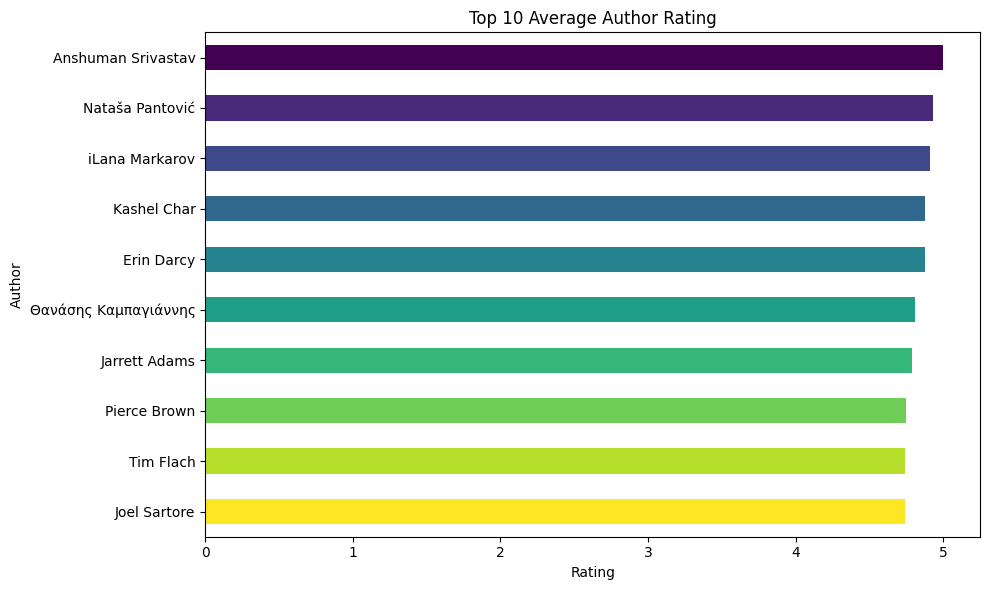

In [56]:
#Plotting
plt.figure(figsize = (10,6))
colors = plt.cm.viridis(np.linspace(0, 1, 10)) 
avg_author_rating.head(10).plot(kind='barh', color=colors)
plt.title('Top 10 Average Author Rating')
plt.xlabel('Rating')
plt.ylabel('Author')

#invert
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [46]:
#Calculating top authors by number of votes
author_by_votes = merged_data.groupby('Author')['Number of Votes'].sum().sort_values(ascending = False)
author_by_votes

Author
Shana Galen         362948.0
Wole Soyinka        285278.0
Cassie Gustafson    271046.0
Sibéal Pounder      263568.0
Peter Schweizer     260309.0
                      ...   
Adam Silvera             0.0
Adam Mitzner             0.0
Adam Mansbach            0.0
Adam M. Grant            0.0
A.K. Larkwood            0.0
Name: Number of Votes, Length: 1766, dtype: float64

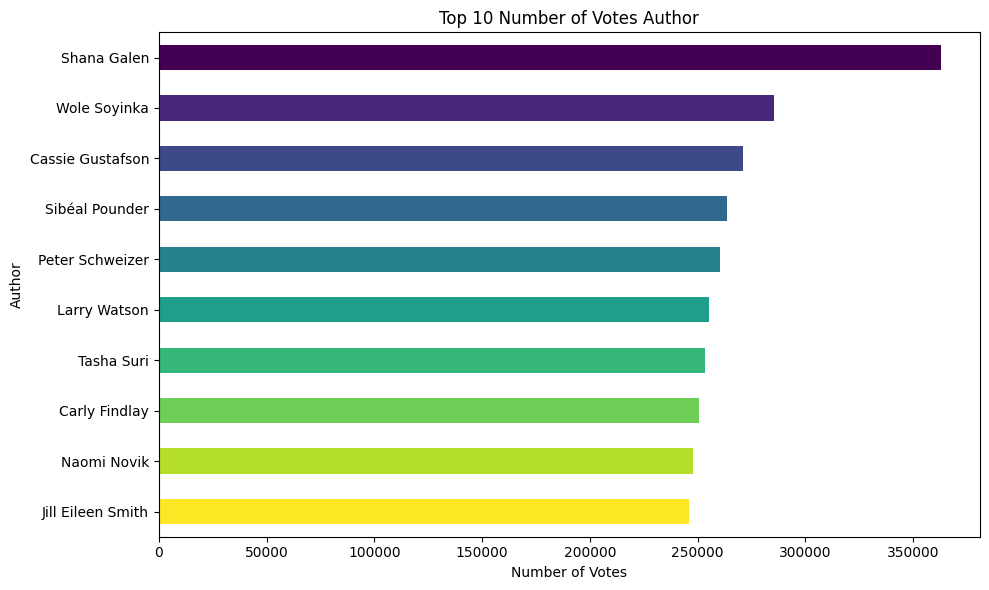

In [55]:
#Plotting the Top Authors by number of votes
plt.figure(figsize = (10,6))
colors = plt.cm.viridis(np.linspace(0, 1, 10)) 
author_by_votes.head(10).plot(kind='barh', color=colors)
plt.title('Top 10 Number of Votes Author')
plt.xlabel('Number of Votes')
plt.ylabel('Author')

#invert
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

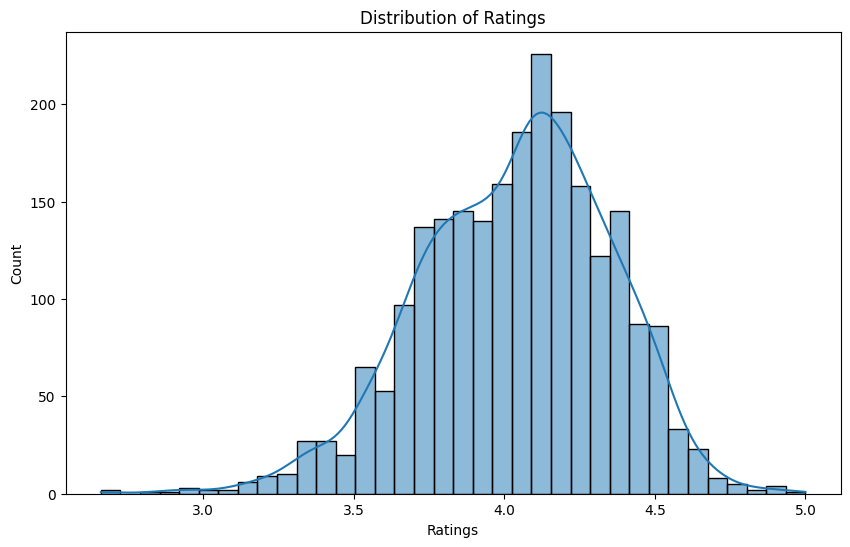

In [60]:
plt.figure(figsize = (10,6))
sns.histplot(df['Rating'], kde = True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.show()

In [69]:
#Pie Chart Top 10 Best seller Author

Top10_Author = df['Author'].value_counts().head(10)

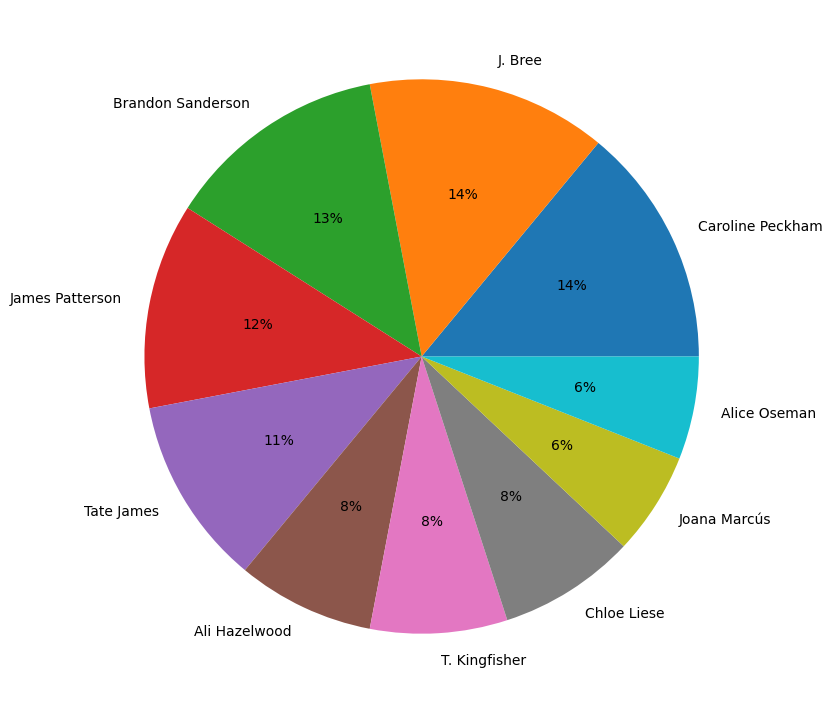

In [76]:
plt.figure(figsize =(9,9))
plt.pie(Top10_Author, labels = Top10_Author.index, autopct = '%.0f%%')
plt.show()